PS: Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1509, 1)

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [5]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train.shape

(1449, 60)

In [7]:
y_train.shape

(1449,)

In [8]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1449, 60, 1)

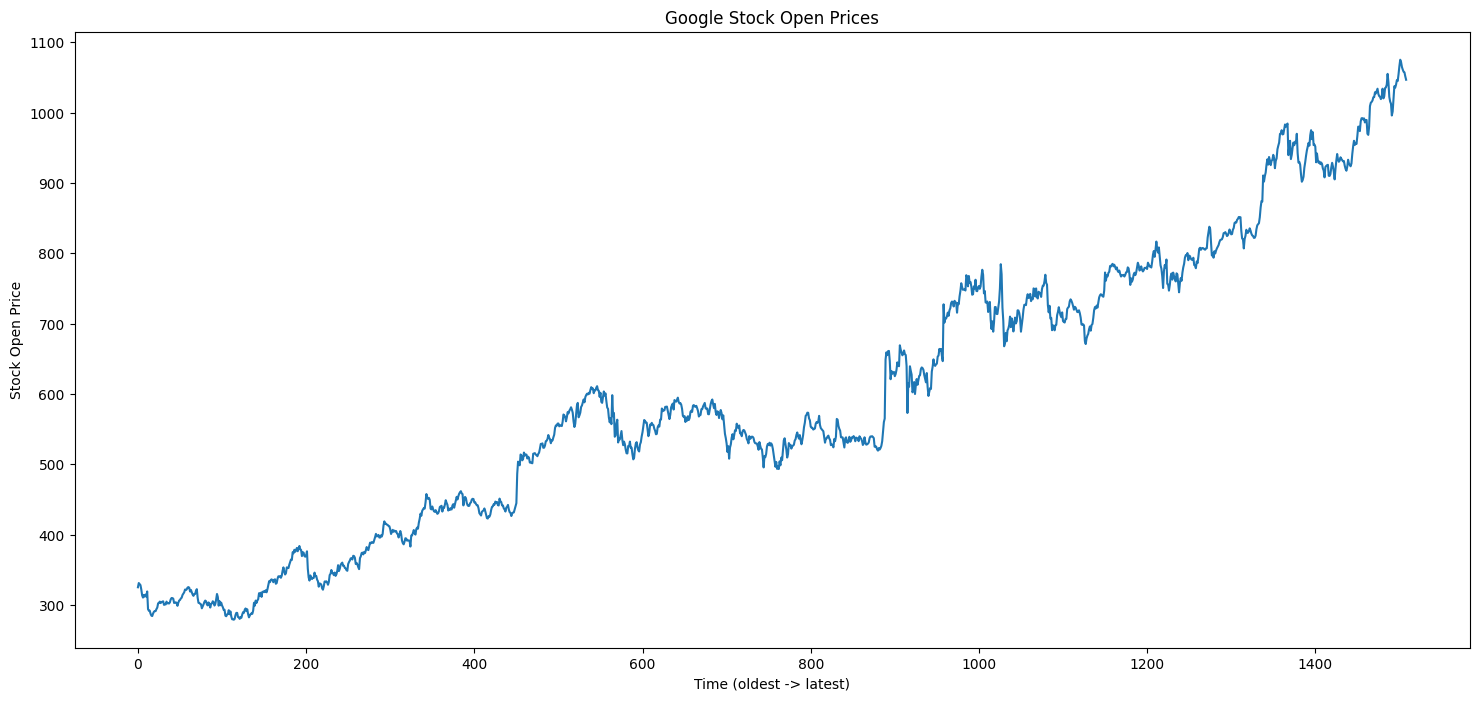

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

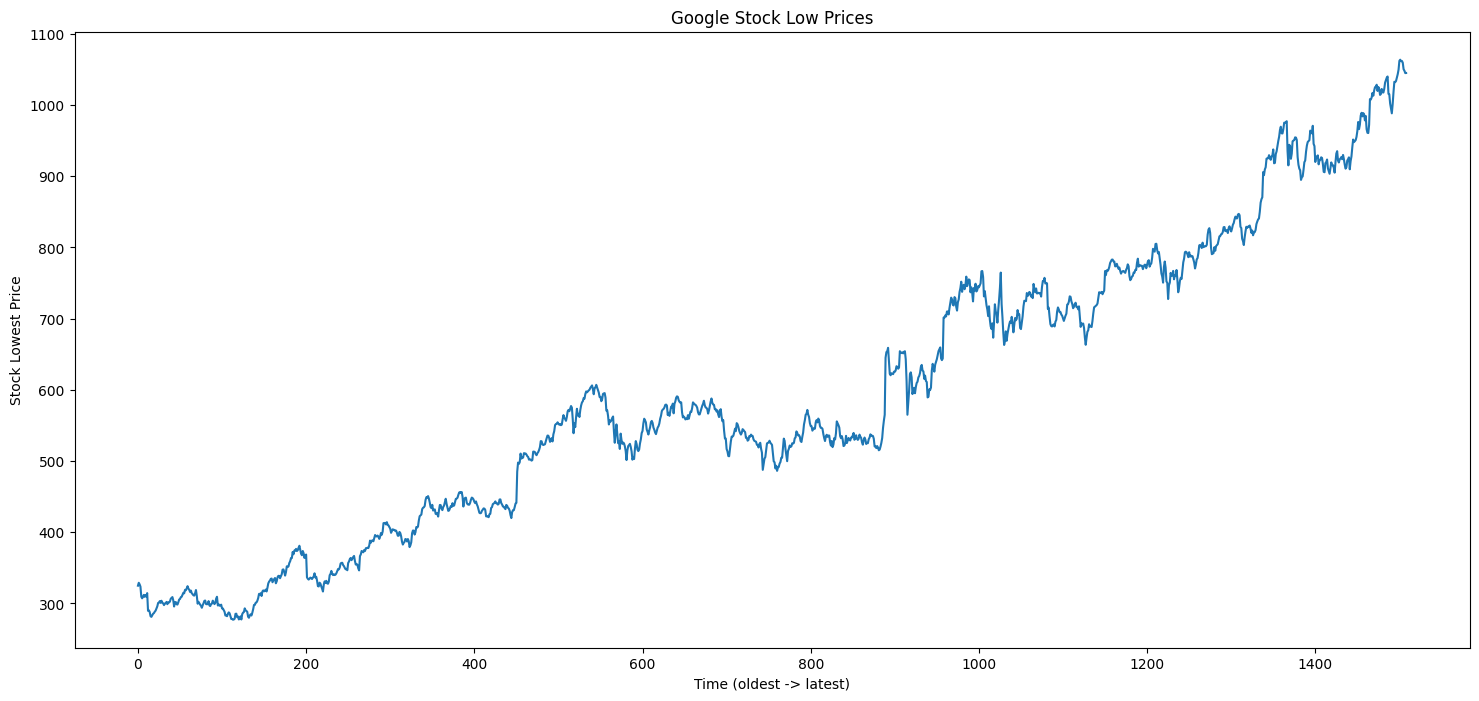

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [12]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 25s 192ms/step - loss: 0.0321
Epoch 2/100
46/46 [==============================] - 7s 156ms/step - loss: 0.0050
Epoch 3/100
46/46 [==============================] - 7s 139ms/step - loss: 0.0042
Epoch 4/100
46/46 [==============================] - 8s 182ms/step - loss: 0.0033
Epoch 5/100
46/46 [==============================] - 5s 117ms/step - loss: 0.0034
Epoch 6/100
46/46 [==============================] - 8s 166ms/step - loss: 0.0035
Epoch 7/100
46/46 [==============================] - 8s 171ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 10s 210ms/step - loss: 0.0027
Epoch 9/100
46/46 [==============================] - 8s 165ms/step - loss: 0.0026
Epoch 10/100
46/46 [==============================] - 8s 163ms/step - loss: 0.0031
Epoch 11/100
46/46 [==============================] - 7s 152ms/step - loss: 0.0027
Epoch 12/100
46/46 [==============================] - 8s 178ms/step - loss: 0.0024
Epoch 13/10

In [15]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [16]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [17]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [18]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [19]:
len(inputs)

185

In [20]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
X_test.shape

(125, 60, 1)

In [22]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 33ms/step


In [23]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

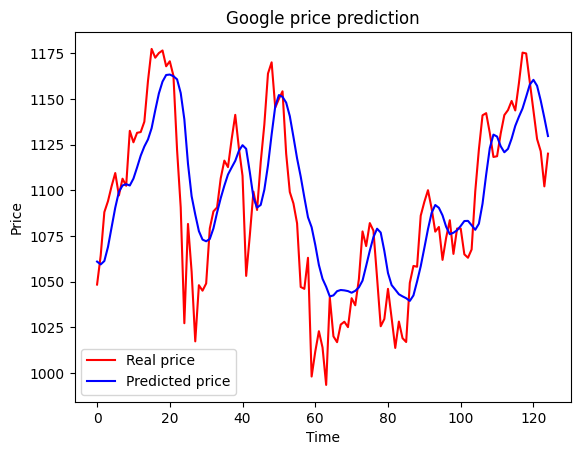

In [24]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Simple Version!

Epoch 1/100
17/17 [==============================] - 7s 111ms/step - loss: 0.0424
Epoch 2/100
17/17 [==============================] - 2s 114ms/step - loss: 0.0083
Epoch 3/100
17/17 [==============================] - 2s 110ms/step - loss: 0.0052
Epoch 4/100
17/17 [==============================] - 2s 115ms/step - loss: 0.0043
Epoch 5/100
17/17 [==============================] - 3s 181ms/step - loss: 0.0040
Epoch 6/100
17/17 [==============================] - 2s 119ms/step - loss: 0.0035
Epoch 7/100
17/17 [==============================] - 2s 114ms/step - loss: 0.0033
Epoch 8/100
17/17 [==============================] - 2s 118ms/step - loss: 0.0034
Epoch 9/100
17/17 [==============================] - 2s 123ms/step - loss: 0.0029
Epoch 10/100
17/17 [==============================] - 2s 136ms/step - loss: 0.0033
Epoch 11/100
17/17 [==============================] - 3s 165ms/step - loss: 0.0027
Epoch 12/100
17/17 [==============================] - 2s 122ms/step - loss: 0.0025
Epoch 13/100


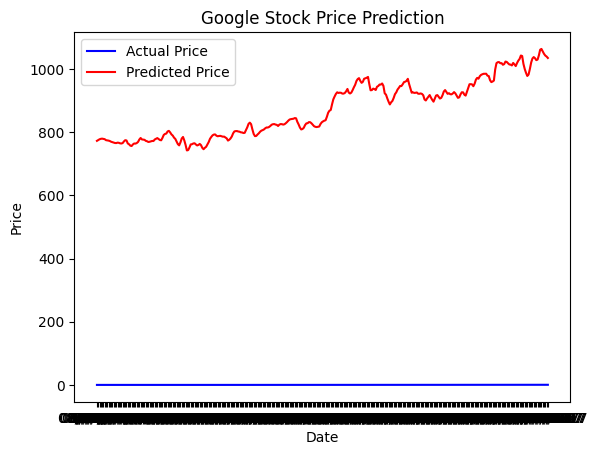

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Train.csv')
# Preprocess data
data['Close'] = data['Close'].str.replace(',', '').astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define function to create dataset
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Hyperparameters
time_step = 100
# Create dataset
X, y = create_dataset(scaled_data, time_step)
# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(train_X, train_y, epochs=100, batch_size=64)

# Predictions
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)

# Evaluate model
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE:", rmse)

# Visualize results
plt.plot(data['Date'][-len(predictions):], test_y, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(predictions):], predictions, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()
